In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from typing import List, Optional, Dict, Tuple
from tqdm import tqdm
import numpy as np
import os
import math

# Load the data

In [69]:
# makes an object of all the prediction files
def parse_filename(filepath):
    """Extract residues and label from filename"""
    filename = os.path.basename(filepath)  # Get filename without path
    parts = filename.split('_')
    residues = parts[0]  # 'ST' or 'Y'
    label = parts[1]     # 'Phospho'
    return residues, label
    
def load_and_annotate_predictions(filepath):
    """Load a prediction file and add residues and label columns"""
    # Read the CSV
    df = pd.read_csv(filepath, sep=',')
    
    # Get residues and label from filename
    residues, label = parse_filename(filepath)
    
    # Add new columns
    df['residues'] = residues
    df['label'] = label
    
    return df

In [70]:
# Read in the prediciton files
files = [
    "/home/sander/apps/slim/ptm_predictions/ST_Phospho_Human_Peptides_1,7,30_Preds.csv",
    "/home/sander/apps/slim/ptm_predictions/Y_Phospho_Human_Peptides_1,7,30_Preds.csv"
]  
modifications = pd.concat([load_and_annotate_predictions(f) for f in files], 
                        ignore_index=True)

In [71]:
modifications.head()

,prot_id,position,pred,residues,label
0,A0A075B706,1,0.1249,ST,Phospho
1,A0A075B706,10,0.1613,ST,Phospho
2,A0A075B706,13,0.1005,ST,Phospho
3,A0A0G2JS06,40,0.0442,ST,Phospho
4,A0A0G2JS06,42,0.0299,ST,Phospho


In [391]:
# Read the different Diann results
#diann_lf = pd.read_parquet("/home/sander/apps/slim/diann_results/diann_speclib_fasta.parquet") # optional
diann000 = pd.read_parquet("/public/compomics/sander/regular/TTOF6600_SWATH/diann_results/TTOF6600_SWATH_000_speclib.parquet")
diann005 = pd.read_parquet("/public/compomics/sander/regular/TTOF6600_SWATH/diann_results/TTOF6600_SWATH_005_control.parquet")
diann010 = pd.read_parquet("/public/compomics/sander/regular/TTOF6600_SWATH/diann_results/TTOF6600_SWATH_010_control.parquet")
diann020 = pd.read_parquet("/public/compomics/sander/regular/TTOF6600_SWATH/diann_results/TTOF6600_SWATH_020_control.parquet")
diann040 = pd.read_parquet("/public/compomics/sander/regular/TTOF6600_SWATH/diann_results/TTOF6600_SWATH_040_control.parquet")
diann080 = pd.read_parquet("/public/compomics/sander/regular/TTOF6600_SWATH/diann_results/TTOF6600_SWATH_080_control.parquet")
diann099 = pd.read_parquet("/public/compomics/sander/regular/TTOF6600_SWATH/diann_results/TTOF6600_SWATH_099_control.parquet")

# make the diann_run_list
diann_runs_list = [diann000, diann005, diann010, diann020, diann040, diann080, diann099]

# display options: 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [392]:
diann000.head()

,Run.Index,Run,Channel,Precursor.Id,Precursor.Channels.Group,Modified.Sequence,Stripped.Sequence,Precursor.Charge,Precursor.Lib.Index,Proteotypic,Precursor.Mz,Protein.Ids,Protein.Group,Protein.Names,Genes,RT,iRT,Predicted.RT,Predicted.iRT,IM,iIM,Predicted.IM,Predicted.iIM,Precursor.Quantity,Precursor.Normalised,Ms1.Area,Ms1.Normalised,Ms1.Apex.Area,Ms1.Apex.Mz.Delta,Normalisation.Factor,Quantity.Quality,Empirical.Quality,Normalisation.Noise,Ms1.Profile.Corr,Averagine,Evidence,Mass.Evidence,Ms1.Total.Signal.Before,Ms1.Total.Signal.After,RT.Start,RT.Stop,FWHM,PG.Normalised,PG.MaxLFQ,Genes.Normalised,Genes.MaxLFQ,Genes.MaxLFQ.Unique,PG.MaxLFQ.Quality,Q.Value,PEP,Global.Q.Value,Lib.Q.Value,Peptidoform.Q.Value,Global.Peptidoform.Q.Value,Lib.Peptidoform.Q.Value,PTM.Q.Value,PTM.Site.Confidence,Site.Occupancy.Probabilities,Protein.Sites,Lib.PTM.Site.Confidence,Translated.Q.Value,Channel.Q.Value,PG.Q.Value,PG.PEP,GG.Q.Value,Protein.Q.Value,Global.PG.Q.Value,Lib.PG.Q.Value
0,0,LFQ_TTOF6600_SWATH_Human_01,,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,AAAAAAAAAAAAAAAASAGGK,2,0,1,818.396729,P0CG40,,,,63.202332,32.461361,63.203430,32.431843,0.0,0.0,0.0,0.0,477088.0,4.839279e+05,402063.0,4.078272e+05,402063.0,0.012770,1.014337,0.0,0.0,-0.007874,0.992936,0.994414,4.995139,0.046317,44091688.0,39715000.0,62.928082,63.545166,0.333695,0.0,0.00000,0.0,0.00000,0.00000,0.000000,0.195769,1.000000,0.385540,0.342869,1.0,0.622373,0.757853,1.0,1.000000,AAAAAAAAAAAAAAAAS(UniMod:21){1.000000}AGGK2,,1.00000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,LFQ_TTOF6600_SWATH_Human_02,,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,AAAAAAAAAAAAAAAASAGGK,2,0,1,818.396729,P0CG40,,,,62.859516,32.461361,62.823261,32.411198,0.0,0.0,0.0,0.0,512886.0,5.209784e+05,441672.0,4.486408e+05,440010.0,0.012842,1.015778,0.0,0.0,-0.000701,0.996219,0.980558,4.481440,0.409976,41224876.0,38211864.0,62.516682,63.202351,0.354414,0.0,0.00000,0.0,0.00000,0.00000,0.000000,0.248854,1.000000,0.385540,0.342869,1.0,0.622373,0.757853,1.0,1.000000,AAAAAAAAAAAAAAAAS(UniMod:21){1.000000}AGGK2,,1.00000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,2,LFQ_TTOF6600_SWATH_Human_03,,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,AAAAAAAAAAAAAAAASAGGK,2,0,1,818.396729,P0CG40,,,,62.379566,32.461361,62.411114,32.468826,0.0,0.0,0.0,0.0,514027.0,5.001317e+05,438885.0,4.270210e+05,437385.0,0.013765,0.972968,0.0,0.0,0.004961,0.983398,0.983499,5.068384,0.025643,41542888.0,38859656.0,62.036732,62.722401,0.310817,0.0,0.00000,0.0,0.00000,0.00000,0.000000,0.224306,1.000000,0.385540,0.342869,1.0,0.622373,0.757853,1.0,1.000000,AAAAAAAAAAAAAAAAS(UniMod:21){1.000000}AGGK2,,1.00000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0,LFQ_TTOF6600_SWATH_Human_01,,AAAAAAAAAPAAAATAPTT(UniMod:21)AATTAATAAQ3,AAAAAAAAAPAAAATAPTT(UniMod:21)AATTAATAAQ3,AAAAAAAAAPAAAATAPTT(UniMod:21)AATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ,3,1,1,816.730957,P37108,P37108,SRP14_HUMAN,SRP14,102.902046,97.551613,102.944832,97.580452,0.0,0.0,0.0,0.0,1351415.0,1.422888e+06,1391370.0,1.464956e+06,1339365.0,-0.010125,1.052887,0.0,0.0,-0.000107,0.908943,1.000000,3.623615,0.000000,30542324.0,31041640.0,102.216385,103.382004,0.434593,0.0,205523.28125,0.0,205523.28125,205523.28125,0.985085,0.040714,0.814286,0.040714,0.027073,1.0,0.135548,0.050000,1.0,0.683020,AAAAAAAAAPAAAAT{0.116000}APT{0.016000}T(UniMod:21){0.683000}AAT{0.162000}T{0.023000}AAT{0.000000}AAQ3,[P37108:T126],0.75277,0.0,0.0,0.000343,0.000656,0.000343,0.000343,0.000341,0.000375
4,1,LFQ_TTOF6600_SWATH_Human_02,,AAAAAAAAAPAAAATAPTT(UniMod:21)AATTAATAAQ3,AAAAAAAAAPAAAATAPTT(UniMod:21)AATTAATAAQ3,AAAAAAAAAPAAAATAPTT(UniMod:21)AATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ,3,1,1,816.730957,P37108,P37108,SRP14_HUMAN,SRP14,102.490646,97.551613,102.539955,97.513115,0.0,0.0,0.0,0.0,1563372.0,1.

In [393]:
def parse_filename(filepath):
    """Extract residues and label from filename"""
    filename = os.path.basename(filepath)  # Get filename without path
    parts = filename.split('_')
    residues = parts[0]  # 'ST' or 'Y'
    label = parts[1]     # 'Phospho'
    return residues, label
    
def load_and_annotate_predictions(filepath):
    """Load a prediction file and add residues and label columns"""
    # Read the CSV
    df = pd.read_csv(filepath, sep=',')
    
    # Get residues and label from filename
    residues, label = parse_filename(filepath)
    
    # Add new columns
    df['residues'] = residues
    df['label'] = label
    
    return df

In [394]:
def process_diann_results(diann_runs_list, run_ids):
    """
    Processes multiple DIA-NN result sets and combines them into a single DataFrame.
    Similar structure to the AlphaDIA processing, but adapted for DIA-NN's data format.
    
    Args:
        diann_runs_list: List of DataFrames containing DIA-NN results from different thresholds
        run_ids: List of analysis identifiers (e.g., '000', '005', etc.)
    
    Returns:
        DataFrame: Combined results with consistent format for comparison with AlphaDIA
    """
    print("Starting DIA-NN data processing...")
    
    # Dictionary to store all unique precursor IDs and their data
    precursor_data = {}
    all_runs = set()
    
    # Dictionary to store peptide metadata that stays constant across runs
    peptide_metadata = {}
    
    # Process each analysis set
    for df, run_id in tqdm(zip(diann_runs_list, run_ids), total=len(run_ids), desc="Processing analysis sets"):
        print(f"\nAnalysis {run_id}:")
        print(f"Total identifications: {len(df)}")
        
        # Process each precursor in this analysis
        for _, row in df.iterrows():
            # Get the precursor ID directly - it already has the charge
            precursor_id = row['Precursor.Id']
            
            # Store metadata if we haven't seen this precursor before
            if precursor_id not in peptide_metadata:
                peptide_metadata[precursor_id] = {
                    'StrippedPeptide': row['Stripped.Sequence'],
                    'ModifiedPeptide': row['Modified.Sequence'],
                    'proteins': row['Protein.Ids'],
                    # We'll extract charge from the Precursor.Id which has it at the end
                    'charge': int(precursor_id[-1]) if precursor_id[-1].isdigit() else None
                }
            
            # Get the run identifier from the data
            run = row['Run']  # Adjust this if the run column has a different name
            all_runs.add(run)
            
            # Initialize nested dictionaries if needed
            if precursor_id not in precursor_data:
                precursor_data[precursor_id] = {}
            if run not in precursor_data[precursor_id]:
                precursor_data[precursor_id][run] = {}
            
            # Store the data for this analysis
            precursor_data[precursor_id][run][run_id] = {
                'found': True,
                'qval': row['Global.Peptidoform.Q.Value'],
                'proba': row['PEP']
            }
    
    print("\nCreating final DataFrame...")
    
    # Convert the nested dictionary structure to a list of rows
    rows = []
    all_runs = sorted(all_runs)
    
    # Create rows for each precursor-run combination
    for precursor_id in tqdm(precursor_data.keys(), desc="Building final matrix"):
        metadata = peptide_metadata[precursor_id]
        
        for run in all_runs:
            # Initialize row with precursor_id, run, and metadata
            row = {
                'precursor_id': precursor_id,
                'run': run,
                'StrippedPeptide': metadata['StrippedPeptide'],
                'ModifiedPeptide': metadata['ModifiedPeptide'],
                'proteins': metadata['proteins'],
                'charge': metadata['charge']
            }
            
            # Add data for each analysis
            for run_id in run_ids:
                analysis_data = (precursor_data.get(precursor_id, {})
                               .get(run, {})
                               .get(run_id, {'found': False, 'qval': np.nan, 'proba': np.nan}))
                
                row[f'{run_id}_found'] = analysis_data['found']
                row[f'{run_id}_qval'] = analysis_data['qval']
                row[f'{run_id}_proba'] = analysis_data['proba']
            
            rows.append(row)
    
    # Create the final DataFrame
    final_df = pd.DataFrame(rows)
    
    # Generate summary statistics
    print("\nGenerating summary statistics...")
    summary_stats = pd.DataFrame([{
        'run_id': run_id,
        'total_precursors': len(final_df[f'{run_id}_found']),
        'identified_precursors': final_df[f'{run_id}_found'].sum(),
        'mean_qval': final_df[final_df[f'{run_id}_found']][f'{run_id}_qval'].mean(),
        'median_qval': final_df[final_df[f'{run_id}_found']][f'{run_id}_qval'].median(),
        'mean_proba': final_df[final_df[f'{run_id}_found']][f'{run_id}_proba'].mean(),
        'median_proba': final_df[final_df[f'{run_id}_found']][f'{run_id}_proba'].median()
    } for run_id in run_ids])
    
    return final_df, summary_stats

# Let's use this function to process our DIA-NN data
run_ids = ['000', '005', '010', '020', '040', '080', '099']
diann_result_df, diann_summary_stats = process_diann_results(diann_runs_list, run_ids)

# Sort the results consistently
diann_result_df = diann_result_df.sort_values(['precursor_id', 'run'])

# Let's examine some of the phosphopeptides
print("\nSample of phosphopeptides from DIA-NN analysis:")
phospho_mask = diann_result_df['ModifiedPeptide'].str.contains('UniMod:21', na=False)
print(f"Total phosphopeptides found: {phospho_mask.sum()}")
diann_result_df[phospho_mask].head()

Starting DIA-NN data processing...


Processing analysis sets:   0%|          | 0/7 [00:00<?, ?it/s]


Analysis 000:
Total identifications: 122174


Processing analysis sets:  14%|█▍        | 1/7 [00:02<00:16,  2.74s/it]


Analysis 005:
Total identifications: 129426


Processing analysis sets:  29%|██▊       | 2/7 [00:05<00:14,  2.83s/it]


Analysis 010:
Total identifications: 118745


Processing analysis sets:  43%|████▎     | 3/7 [00:08<00:10,  2.71s/it]


Analysis 020:
Total identifications: 129975


Processing analysis sets:  57%|█████▋    | 4/7 [00:11<00:08,  2.76s/it]


Analysis 040:
Total identifications: 122260


Processing analysis sets:  71%|███████▏  | 5/7 [00:13<00:05,  2.72s/it]


Analysis 080:
Total identifications: 131089


Processing analysis sets:  86%|████████▌ | 6/7 [00:16<00:02,  2.78s/it]


Analysis 099:
Total identifications: 128202


Processing analysis sets: 100%|██████████| 7/7 [00:19<00:00,  2.76s/it]



Creating final DataFrame...


Building final matrix: 100%|██████████| 100244/100244 [00:01<00:00, 60353.23it/s]



Generating summary statistics...

Sample of phosphopeptides from DIA-NN analysis:
Total phosphopeptides found: 53112


,precursor_id,run,StrippedPeptide,ModifiedPeptide,proteins,charge,000_found,000_qval,000_proba,005_found,005_qval,005_proba,010_found,010_qval,010_proba,020_found,020_qval,020_proba,040_found,040_qval,040_proba,080_found,080_qval,080_proba,099_found,099_qval,099_proba
0,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,LFQ_TTOF6600_SWATH_Human_01,AAAAAAAAAAAAAAAASAGGK,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,P0CG40,2,True,0.622373,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
1,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,LFQ_TTOF6600_SWATH_Human_02,AAAAAAAAAAAAAAAASAGGK,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,P0CG40,2,True,0.622373,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
2,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,LFQ_TTOF6600_SWATH_Human_03,AAAAAAAAAAAAAAAASAGGK,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,P0CG40,2,True,0.622373,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
233589,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ3,LFQ_TTOF6600_SWATH_Human_01,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ,P37108,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,0.094209,0.561930,False,NaN,NaN,True,0.023168,1.00000,False,NaN,NaN
233590,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ3,LFQ_TTOF6600_SWATH_Human_02,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ,P37108,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,0.094209,0.595602,True,0.065178,0.272745,True,0.023168,0.38282,False,NaN,NaN


In [395]:
diann_result_df[phospho_mask].head()

,precursor_id,run,StrippedPeptide,ModifiedPeptide,proteins,charge,000_found,000_qval,000_proba,005_found,005_qval,005_proba,010_found,010_qval,010_proba,020_found,020_qval,020_proba,040_found,040_qval,040_proba,080_found,080_qval,080_proba,099_found,099_qval,099_proba
0,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,LFQ_TTOF6600_SWATH_Human_01,AAAAAAAAAAAAAAAASAGGK,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,P0CG40,2,True,0.622373,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
1,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,LFQ_TTOF6600_SWATH_Human_02,AAAAAAAAAAAAAAAASAGGK,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,P0CG40,2,True,0.622373,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
2,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,LFQ_TTOF6600_SWATH_Human_03,AAAAAAAAAAAAAAAASAGGK,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,P0CG40,2,True,0.622373,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
233589,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ3,LFQ_TTOF6600_SWATH_Human_01,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ,P37108,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,0.094209,0.561930,False,NaN,NaN,True,0.023168,1.00000,False,NaN,NaN
233590,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ3,LFQ_TTOF6600_SWATH_Human_02,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ,P37108,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,0.094209,0.595602,True,0.065178,0.272745,True,0.023168,0.38282,False,NaN,NaN


## add the modification predictions

In [396]:
def read_proteome(canonical_proteome):
    """
    Reads the proteome sequences from the FASTA file, filters X and U aa from proteome

    Parameters:
    canonical_proteome : str
        Path to the FASTA file containing the proteome sequences

    Returns:
    dict
        A dictionary where keys are protein IDs and values are sequences
        {prot1: 'PEPTIDERRRPEPTIDE...', ...}
    """
    sequences = {}  # {prot_id: sequence}
    with open(canonical_proteome, 'r') as f:
        prot_id = None
        seq_lines = []
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                if prot_id:
                    sequence = ''.join(seq_lines)
                    if 'U' not in sequence and 'X' not in sequence:
                        sequences[prot_id] = sequence
                    seq_lines = []
                prot_id = line[1:].split()[0]
            else:
                seq_lines.append(line)
        if prot_id:
            sequence = ''.join(seq_lines)
            if 'U' not in sequence and 'X' not in sequence:
                sequences[prot_id] = sequence
    return sequences

In [397]:
canonical_proteome = '/home/sander/apps/slim/general_data/UP000005640_9606_prot_id.fasta'
proteome = read_proteome(canonical_proteome)

In [398]:
# we digest the proteome just like we did when making the library: we can use peptide start position to quickly find the postions of the target modifications:
def digest_protein(sequence, missed_cleavages=0, min_length=0, max_length=None):
    """
    Performs trypsin digestion on a single protein sequence.

    Args:
        sequence (str): Protein sequence
        missed_cleavages (int): Number of allowed missed cleavages
        min_length (int): Minimum peptide length
        max_length (int): Maximum peptide length (None for no limit)

    Returns:
        list: List of tuples (peptide, start_pos) where start_pos is 0-based

    Example:
        Input: "PEPTIDERPRRPEPTIDE"
        Output: [('PEPTIDER', 0), ('PEPTIDERR', 0), ..., ('RPEPTIDE', 9)]
    """
    cleavage_sites = []
    for i in range(len(sequence) - 1):
        if sequence[i] in ('K', 'R') and sequence[i+1] != 'P':
            cleavage_sites.append(i+1)
    cleavage_sites = [0] + cleavage_sites + [len(sequence)]
    
    peptides = []
    for start_idx in range(len(cleavage_sites)-1):
        for end_idx in range(start_idx+1, min(len(cleavage_sites), start_idx+missed_cleavages+2)):
            pep_start = cleavage_sites[start_idx]
            pep_end = cleavage_sites[end_idx]
            peptide = sequence[pep_start:pep_end]
            if min_length <= len(peptide) <= (max_length if max_length else len(peptide)):
                # Validate that the peptide actually starts at pep_start
                assert sequence[pep_start:pep_start+len(peptide)] == peptide
                peptides.append((peptide, pep_start))
    return peptides

def calculate_miscleavages(peptide_seq, protein_seq, start_pos):
    """
    Calculates the number of missed cleavages in a single peptide.

    Args:
        peptide_seq (str): Peptide sequence
        protein_seq (str): Full protein sequence
        start_pos (int): Start position of peptide in protein (0-based)

    Returns:
        int: Number of missed cleavages

    Example:
        Input: ('PEPTIDERPR', 'PEPTIDERPRRPEPTIDE', 0)
        Output: 1
    """
    # Validate that the peptide actually occurs at start_pos
    assert protein_seq[start_pos:start_pos+len(peptide_seq)] == peptide_seq, \
           f"Peptide {peptide_seq} not found at position {start_pos} in protein"
    
    miscleavages = 0
    for i in range(len(peptide_seq)-1):  # Changed range to avoid going past peptide end
        abs_pos = start_pos + i  # Removed the -1 offset
        if protein_seq[abs_pos] in ('K', 'R') and protein_seq[abs_pos+1] != 'P':
            miscleavages += 1
    return miscleavages

def trypsin_digest(sequences, missed_cleavages, min_length, max_length):
    """
    Performs trypsin digestion on all protein sequences.
    
    Args:
        sequences (dict): Dictionary of protein sequences {prot_id: sequence}
        missed_cleavages (int): Number of allowed missed cleavages
        min_length (int): Minimum peptide length
        max_length (int): Maximum peptide length

    Returns:
        list: List of dictionaries containing peptide information
        
    Example:
        Input: {'prot1': 'PEPTIDERRRPEPTIDE...', ...}
        Output: [{'prot_id': 'prot1', 'sequence': 'PEPTIDERPR', 'miscleavages': 1, 
                 'peptide_length': 10, 'start_pos': 0}, ...]
    """
    digested_peptides = []
    for prot_id, seq in sequences.items():
        peptides = digest_protein(seq, missed_cleavages, min_length, max_length)
        for peptide, start_pos in peptides:
            # Validate peptide position
            assert seq[start_pos:start_pos+len(peptide)] == peptide, \
                   f"Position mismatch for peptide {peptide} in protein {prot_id}"
            
            miscleavages = calculate_miscleavages(peptide, seq, start_pos)
            digested_peptides.append({
                'prot_id': prot_id,
                'sequence': peptide,
                'miscleavages': miscleavages,
                'peptide_length': len(peptide),
                'start_pos': start_pos
            })
    return digested_peptides

In [399]:
peptides = trypsin_digest(sequences = proteome, missed_cleavages = 1, min_length = 7, max_length = 30)
peptides

[{'prot_id': 'A0A075B706',
  'sequence': 'TDKLIFGK',
  'miscleavages': 1,
  'peptide_length': 8,
  'start_pos': 0},
 {'prot_id': 'A0A075B706',
  'sequence': 'LIFGKGTR',
  'miscleavages': 1,
  'peptide_length': 8,
  'start_pos': 3},
 {'prot_id': 'A0A075B706',
  'sequence': 'GTRVTVEP',
  'miscleavages': 1,
  'peptide_length': 8,
  'start_pos': 8},
 {'prot_id': 'A0A0G2JS06',
  'sequence': 'FTCTLRSGINVGTYR',
  'miscleavages': 1,
  'peptide_length': 15,
  'start_pos': 38},
 {'prot_id': 'A0A0G2JS06',
  'sequence': 'SGINVGTYR',
  'miscleavages': 0,
  'peptide_length': 9,
  'start_pos': 44},
 {'prot_id': 'A0A0G2JS06',
  'sequence': 'SGINVGTYRIYWYQQKPGSLPR',
  'miscleavages': 1,
  'peptide_length': 22,
  'start_pos': 44},
 {'prot_id': 'A0A0G2JS06',
  'sequence': 'IYWYQQKPGSLPR',
  'miscleavages': 0,
  'peptide_length': 13,
  'start_pos': 53},
 {'prot_id': 'A0A0G2JS06',
  'sequence': 'IYWYQQKPGSLPRYLLR',
  'miscleavages': 1,
  'peptide_length': 17,
  'start_pos': 53},
 {'prot_id': 'A0A0G2JS06',


In [400]:
def add_modification_predictions(diann_result_df, peptides, modifications):
    """
    Adds modification predictions to the DIA-NN results dataframe.

    Args:
        diann_result_df (pd.DataFrame): DIA-NN results with ModifiedPeptide, StrippedPeptide, proteins.
        peptides (list): List of peptide dictionaries with prot_id, sequence, start_pos.
        modifications (pd.DataFrame): DataFrame with prot_id, position, pred, residues, label.

    Returns:
        pd.DataFrame: Original dataframe with added prediction scores.
    """
    import pandas as pd
    import numpy as np
    import re

    print("Adding modification predictions to DIA-NN results...")

    # Create peptides mapping dictionary for quick lookups
    peptides_dict = {}
    for p in peptides:
        key = (p['prot_id'], p['sequence'])
        if key not in peptides_dict:
            peptides_dict[key] = []
        peptides_dict[key].append(p['start_pos'])

    # Create modifications dictionary for quick prediction lookups
    # Convert positions to integers if they are not already
    modifications['position'] = modifications['position'].astype(int)
    mod_dict = modifications.set_index(['prot_id', 'position'])['pred'].to_dict()

    def get_mod_indices(modified_peptide):
        """
        Returns a list of zero-based indices where modifications occur in the stripped peptide.
        """
        mod_indices = []
        current_pos = 0  # Position in the stripped peptide
        i = 0  # Position in the modified peptide string
        while i < len(modified_peptide):
            if modified_peptide[i] == '(':
                # It's a modification; skip it
                end = modified_peptide.find(')', i) + 1
                i = end
            else:
                current_pos += 1
                i += 1
                # Check if the next character is '(', indicating a modification on this amino acid
                if i < len(modified_peptide) and modified_peptide[i] == '(':
                    # Look ahead to see if it's '(UniMod:21)'
                    end = modified_peptide.find(')', i) + 1
                    mod = modified_peptide[i:end]
                    if mod == '(UniMod:21)':
                        # Modification is on the current amino acid
                        mod_indices.append(current_pos - 1)  # Zero-based index
        return mod_indices

    def get_prediction_for_peptide(row):
        """
        Get the highest prediction score for a peptide across all its protein positions.
        Returns a Series with three values: prediction, best_protein, best_position.
        """
        # Initialize default return values
        result = {
            'prediction': np.nan,
            'best_protein': None,
            'best_position': None
        }

        modified_peptide = row['ModifiedPeptide']
        stripped_peptide = row['StrippedPeptide']

        # Check if the peptide contains the modification of interest (UniMod:21)
        if '(UniMod:21)' not in modified_peptide:
            return pd.Series(result)

        try:
            # Find positions of modifications in the peptide
            mod_indices = get_mod_indices(modified_peptide)

            # Get all protein IDs this peptide maps to
            proteins = row['proteins'].split(';')

            max_prediction = -1
            best_position = None
            best_protein = None

            # For each protein, get possible start positions
            for protein in proteins:
                # Get all possible start positions in this protein
                start_positions = peptides_dict.get((protein, stripped_peptide), [])

                # For each start position, calculate the absolute position of the modification
                for start_pos in start_positions:
                    for mod_site in mod_indices:
                        # Adjusting indices to match one-based indexing in the 'modifications' DataFrame
                        abs_position = start_pos + mod_site + 1  # Corrected to +1

                        # Look up the prediction score
                        prediction = mod_dict.get((protein, abs_position))

                        if prediction is not None and prediction > max_prediction:
                            max_prediction = prediction
                            best_position = abs_position
                            best_protein = protein

            # Update result if we found a prediction
            if max_prediction > -1:
                result.update({
                    'prediction': max_prediction,
                    'best_protein': best_protein,
                    'best_position': best_position
                })

        except Exception as e:
            print(f"Error processing row with ModifiedPeptide: {row['ModifiedPeptide']}")
            print(f"Error details: {str(e)}")

        return pd.Series(result)

    # Add predictions to the dataframe
    print("Calculating predictions for each peptide...")
    new_columns = diann_result_df.apply(get_prediction_for_peptide, axis=1)

    # Add the new columns to our dataframe
    for col in ['prediction', 'best_protein', 'best_position']:
        diann_result_df[col] = new_columns[col]

    print("Done adding modification predictions.")
    return diann_result_df



In [401]:
# Run the function
result_with_predictions = add_modification_predictions(diann_result_df, peptides, modifications)
# Display the results
result_with_predictions[['ModifiedPeptide', 'prediction', 'best_protein', 'best_position']].head()

Adding modification predictions to DIA-NN results...
Calculating predictions for each peptide...
Done adding modification predictions.


,ModifiedPeptide,prediction,best_protein,best_position
0,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,0.4017,P0CG40,471.0
1,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,0.4017,P0CG40,471.0
2,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,0.4017,P0CG40,471.0
233589,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ,0.5661,P37108,122.0
233590,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ,0.5661,P37108,122.0


In [402]:
# Create a boolean mask for rows containing phosphopeptides
phospho_mask = result_with_predictions["ModifiedPeptide"].str.contains('UniMod:21', na=False)

# Apply the mask and show the first few entries
# Let's select specific columns for better readability
phospho_peptides = result_with_predictions[phospho_mask]

phospho_peptides.head()

,precursor_id,run,StrippedPeptide,ModifiedPeptide,proteins,charge,000_found,000_qval,000_proba,005_found,005_qval,005_proba,010_found,010_qval,010_proba,020_found,020_qval,020_proba,040_found,040_qval,040_proba,080_found,080_qval,080_proba,099_found,099_qval,099_proba,prediction,best_protein,best_position
0,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,LFQ_TTOF6600_SWATH_Human_01,AAAAAAAAAAAAAAAASAGGK,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,P0CG40,2,True,0.622373,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.4017,P0CG40,471.0
1,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,LFQ_TTOF6600_SWATH_Human_02,AAAAAAAAAAAAAAAASAGGK,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,P0CG40,2,True,0.622373,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.4017,P0CG40,471.0
2,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK2,LFQ_TTOF6600_SWATH_Human_03,AAAAAAAAAAAAAAAASAGGK,AAAAAAAAAAAAAAAAS(UniMod:21)AGGK,P0CG40,2,True,0.622373,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.4017,P0CG40,471.0
233589,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ3,LFQ_TTOF6600_SWATH_Human_01,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ,P37108,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,0.094209,0.561930,False,NaN,NaN,True,0.023168,1.00000,False,NaN,NaN,0.5661,P37108,122.0
233590,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ3,LFQ_TTOF6600_SWATH_Human_02,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAAT(UniMod:21)APTTAATTAATAAQ,P37108,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,0.094209,0.595602,True,0.065178,0.272745,True,0.023168,0.38282,False,NaN,NaN,0.5661,P37108,122.0


# Data analysis

In [418]:
import numpy as np
import matplotlib.pyplot as plt

def create_waterfall_plot(result_df, thresholds=['000', '005', '010', '020', '040', '080', '099']):
    """
    Creates a waterfall plot comparing phosphopeptide identifications across different score thresholds.
    Adapted for the new dataframe format using UniMod notation for modifications.
    
    Parameters:
    result_df: DataFrame containing the analysis results with UniMod modification notation
    thresholds: List of threshold values to analyze
    
    The function identifies phosphopeptides by looking for UniMod:21 in the ModifiedPeptide column,
    which is the UniMod notation for phosphorylation.
    """
    # Filter for phosphopeptides using UniMod notation
    phospho_mask = result_df['ModifiedPeptide'].str.contains('UniMod:21', na=False)
    phospho_df = result_df[phospho_mask].copy()
    
    # Get baseline identifications (000) with proper error handling
    baseline_mask = (
        phospho_df['000_found'] & 
        (phospho_df['000_qval'].fillna(1) <= 0.01) & 
        (phospho_df['000_proba'].fillna(1) <= 0.01)
    )
    baseline_ids = set(phospho_df[baseline_mask].precursor_id)
    
    # Initialize result lists for tracking changes across thresholds
    retained = [len(baseline_ids)+1]  # Number of peptides kept from baseline
    lost = [0]  # Number of peptides lost compared to baseline
    novel = [0]  # Number of new peptides not in baseline
    
    # Calculate statistics for each threshold with robust error handling
    for thresh in thresholds[1:]:
        thresh_mask = (
            phospho_df[f'{thresh}_found'] & 
            (phospho_df[f'{thresh}_qval'].fillna(1) <= 0.01) & 
            (phospho_df[f'{thresh}_proba'].fillna(1) <= 0.01)
        )
        thresh_ids = set(phospho_df[thresh_mask].precursor_id)
        
        # Calculate metrics
        retained.append(len(baseline_ids & thresh_ids))  # Intersection with baseline
        lost.append(-len(baseline_ids - thresh_ids)-1)    # Lost from baseline
        novel.append(len(thresh_ids - baseline_ids))    # New identifications
    
    # Create figure with specific size
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot stacked bars with meaningful colors
    x = np.arange(len(thresholds))
    width = 0.8
    retained_bars = ax.bar(x, retained, width, label='Retained from Baseline', color='lightblue')
    lost_bars = ax.bar(x, lost, width, label='Lost compared to Baseline', color='salmon')
    novel_bars = ax.bar(x, novel, width, bottom=retained, label='Novel compared to Baseline', color='lightgreen')
    
    # Add horizontal reference line at y=0
    ax.axhline(y=0, color='black', linewidth=2)
    
    # Set fixed y-axis limits and ticks for consistency
    ax.set_ylim(-20, 20)
    y_ticks = np.arange(-20, 21, 4)
    ax.set_yticks(y_ticks)
    ax.tick_params(axis='both', which='major', labelsize=18)
    
    # Customize tick labels for readability
    ax.set_xticks(x)
    ax.set_xticklabels(thresholds, rotation=0)
    ax.set_yticklabels([str(int(abs(y))) for y in y_ticks])
    
    # Add subtle gridlines for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=1.0)
    
    
    def add_value_labels(values, bottom=None):
        """
        Adds value labels to bars with careful positioning logic.
        Handles special cases for different regions of the plot.
        """
        for i, v in enumerate(values):
            if abs(v) >= 1:  # Only show labels for values >= 1
                y = bottom[i] if bottom is not None else 0
                if v > 0:
                    y = y if bottom is not None else 0
                    if bottom is not None:  # Novel values
                        if i == 0:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 1:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 2:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 3:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 4:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 5:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 6:  # Last three columns
                            ax.text(i, y + v/2 + 5, str(int(v)), ha='center', va='center',
                                  fontsize=18)

                    else:  # Retained values
                        if i == 0:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 1:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 2:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 3:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 4:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 5:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 6:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)

                else:  # Lost values
                    if i == 0:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 1:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 2:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 3:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 4:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 5:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 6:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
    
    # Add labels to all bar sections
    add_value_labels(retained)
    add_value_labels(lost)
    add_value_labels(novel, retained)
    
    plt.tight_layout()
    return fig


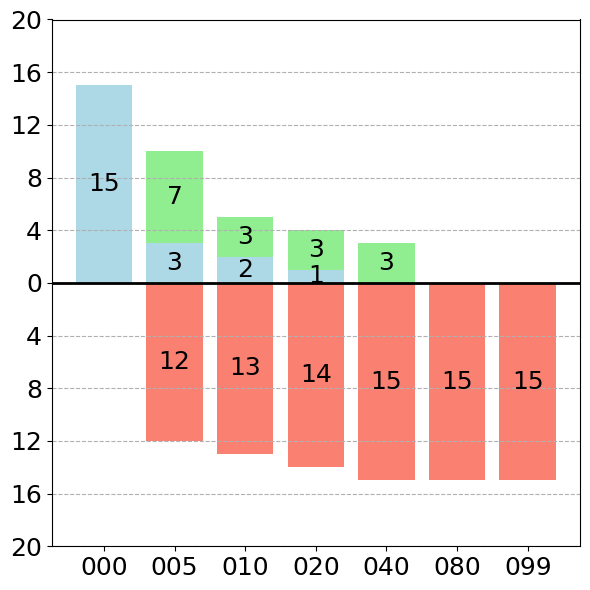

In [419]:
# Create the plot
fig = create_waterfall_plot(diann_result_df)

# Display the plot
plt.show()

In [405]:
def calculate_sensitivity_data(result_df, min_threshold=0.0001, max_threshold=0.05, num_points=500):
    """
    Calculate sensitivity data showing how number of phosphopeptide identifications
    varies with confidence thresholds for each analysis threshold.
    Adapted for UniMod notation in ModifiedPeptide column.
    
    Args:
        result_df: DataFrame containing phosphopeptide analysis results with UniMod modifications
        min_threshold: Minimum confidence threshold to evaluate (default: 0.0001)
        max_threshold: Maximum confidence threshold to evaluate (default: 0.05)
        num_points: Number of threshold points to evaluate (default: 500)
    """
    # Generate evenly spaced thresholds on log scale for confidence evaluation
    thresholds = np.logspace(np.log10(min_threshold), np.log10(max_threshold), num_points)
    
    # Define analysis thresholds to evaluate
    analysis_thresholds = ['000', '005', '010', '020', '040', '080']
    
    # Initialize results dictionary to store counts for each threshold
    results = {thresh: [] for thresh in analysis_thresholds}
    
    # Filter for phosphopeptides using UniMod:21 notation
    phospho_df = result_df[result_df['ModifiedPeptide'].str.contains('UniMod:21', na=False)].copy()
    
    # Calculate identifications for each threshold combination
    for confidence_threshold in thresholds:
        for analysis_threshold in analysis_thresholds:
            # Apply confidence filters with proper NaN handling
            mask = (
                phospho_df[f'{analysis_threshold}_found'] &
                (phospho_df[f'{analysis_threshold}_qval'].fillna(1) <= confidence_threshold) &
                (phospho_df[f'{analysis_threshold}_proba'].fillna(1) <= confidence_threshold)
            )
            
            # Count unique precursors meeting criteria
            unique_precursors = phospho_df[mask]['precursor_id'].nunique()
            results[analysis_threshold].append(unique_precursors)
    
    return thresholds, results

def plot_sensitivity_data(thresholds, results):
    """
    Create sensitivity plot showing identification rates across confidence thresholds.
    Enhanced with improved visual styling and clearer data presentation.
    """
    # Define colors for different analysis thresholds with better contrast
    colors = {
    '000': '#E41A1C',  # Red
    '005': '#377EB8',  # Blue
    '010': '#4DAF4A',  # Green
    '020': '#984EA3',  # Purple
    '040': '#FF7F00',  # Orange
    '080': '#FFFF33'   # Yellow
    }
    
    # Create figure with specified dimensions
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot lines for each analysis threshold with enhanced styling
    for threshold in results.keys():
        ax.plot(thresholds, results[threshold], '-', 
                label=f'Threshold {threshold}',
                color=colors[threshold],
                linewidth=2)
    
    # Add reference line at standard threshold (0.01)
    ax.axvline(x=0.01, color='black', linestyle='--', linewidth=1, alpha=0.7,
               label='Confidence Threshold (0.01)')
    
    # Customize axes with clear labeling
    ax.set_xscale('log')
    ax.tick_params(axis='x', labelsize=24)
    
    # Set tick positions and labels for clear reading
    ax.xaxis.set_minor_locator(plt.NullLocator())
    
    # Set y-axis limits and ticks for optimal data display
    ax.set_ylim(0, 250)
    ax.set_yticks(np.arange(0, 251, 50))
    ax.set_yticklabels([str(int(y)) for y in np.arange(0, 251, 50)], 
                       fontsize=24)
    
    # Add grid for better readability
    ax.grid(True, which='major', linestyle='--', alpha=0.7)
    # Add legend with larger font
    
    plt.tight_layout()
    return fig

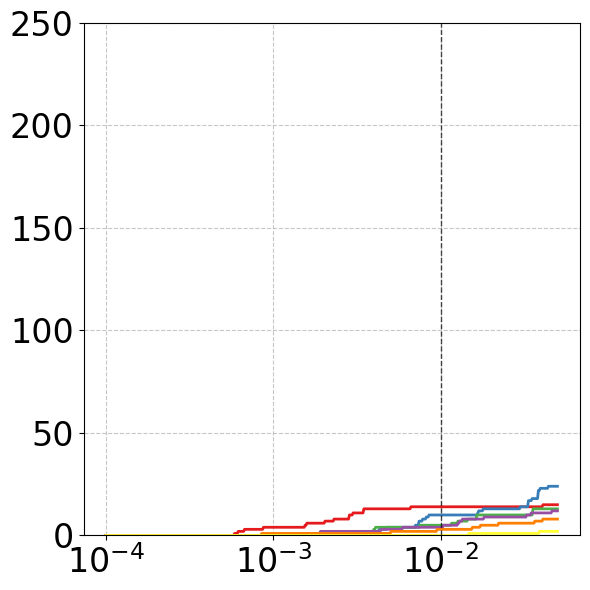

In [406]:
# Calculate the sensitivity data
thresholds, results = calculate_sensitivity_data(diann_result_df)

# Create and display the plot
fig = plot_sensitivity_data(thresholds, results)
plt.show()

# Look at the prediction distribution

In [414]:
def plot_prediction_distribution_bars(result_df, qval_threshold=0.01, proba_threshold=0.01, bin_width=0.05, min_label_count=1, overlap_threshold=15):
    """
    Creates an enhanced stacked bar chart showing prediction score distribution
    with vertical threshold lines and internal legend. Removes labels that would overlap.
    
    Args:
        result_df (pd.DataFrame): DIA-NN results with ModifiedPeptide, prediction, and threshold columns.
        qval_threshold (float): Threshold for q-values to consider high-quality identifications.
        proba_threshold (float): Threshold for probability scores to consider high-quality identifications.
        bin_width (float): Width of each bin in the histogram.
        min_label_count (int): Minimum count required to display a label on a bar segment.
        overlap_threshold (int): Minimum pixel distance between labels to consider them non-overlapping.
    
    Returns:
        matplotlib.figure.Figure: The generated prediction distribution bar chart figure.
    """
    # Filter for phosphopeptides using ModifiedPeptide column
    phospho_mask = result_df['ModifiedPeptide'].str.contains(r'\(UniMod:21\)', regex=True, na=False)
    phospho_df = result_df[phospho_mask].copy()
    
    if phospho_df.empty:
        print("No phosphopeptides found with the specified modification.")
        return None
    
    # Define thresholds and create bins
    thresholds = ['000', '005', '010', '020', '040', '080', '099']
    bins = np.arange(0, 1.1, bin_width)
    bin_centers = bins[:-1] + bin_width / 2
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(6, 6))  # Increased width for better readability
    
    # Define colors for each threshold (customize as needed)
    colors = {
    '000': '#E41A1C',  
    '005': '#377EB8',  
    '010': '#4DAF4A',  
    '020': '#984EA3',  
    '040': '#FF7F00',  
    '080': '#FFFF33',  
    '099': 'Grey'  
    }

    # Update the colors list to use the dictionary values
    colors = list(colors.values())
    
    # Initialize list to hold counts for each threshold
    counts_per_threshold = []
    
    for threshold in thresholds:
        # Apply quality filters
        quality_mask = (
            (phospho_df[f'{threshold}_qval'] <= qval_threshold) & 
            (phospho_df[f'{threshold}_proba'] <= proba_threshold) &
            (phospho_df[f'{threshold}_found'])
        )
        
        # Extract prediction scores for high-quality identifications
        predictions = phospho_df.loc[quality_mask, 'prediction'].dropna()
        
        # Ensure prediction scores are within [0,1]
        predictions = predictions[(predictions >= 0) & (predictions <= 1)]
        
        # Compute histogram counts
        counts, _ = np.histogram(predictions, bins=bins)
        counts_per_threshold.append(counts)
    
    # Convert counts list to a NumPy array for easier manipulation
    counts_per_threshold = np.array(counts_per_threshold)
    
    # Create stacked bar chart
    bottom = np.zeros(len(bins) - 1)
    bars = []
    
    for i, (counts, threshold) in enumerate(zip(counts_per_threshold, thresholds)):
        bar = ax.bar(
            bin_centers, 
            counts, 
            bottom=bottom, 
            width=bin_width * 0.9,  # Slightly narrower bars for better visibility
            label=f'Threshold {threshold}', 
            color=colors[i], 
            alpha=0.7
        )
        bars.append(bar)
        bottom += counts  # Update bottom for stacking
    
    # Add vertical lines for thresholds (optional: adjust based on your specific needs)
    # Assuming these lines represent specific prediction score values
    threshold_values = [0.05, 0.10, 0.20, 0.40, 0.80, 0.99]
    for val in threshold_values:
        ax.axvline(x=val, color='black', linestyle='--', linewidth=1, alpha=0.7)
    
    # Add gridlines
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Set axis limits
    ax.set_xlim(-0.05, 1.05)
    y_max = counts_per_threshold.sum(axis=0).max() + 5  # Dynamic y-axis based on data
    ax.set_ylim(0, y_max)

    # Format axis ticks
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.set_xticks(np.arange(0, 1.1, 0.1))  # Ticks every 0.1
    # Create labels - empty string for 0.1, 0.3, 0.5, 0.7, 0.9, include 1.0
    labels = [f'{x:.1f}' if (x % 0.2 < 0.01 or x == 1.0) else '' for x in np.arange(0, 1.1, 0.1)]
    ax.set_xticklabels(labels)

    plt.tight_layout()
    return fig

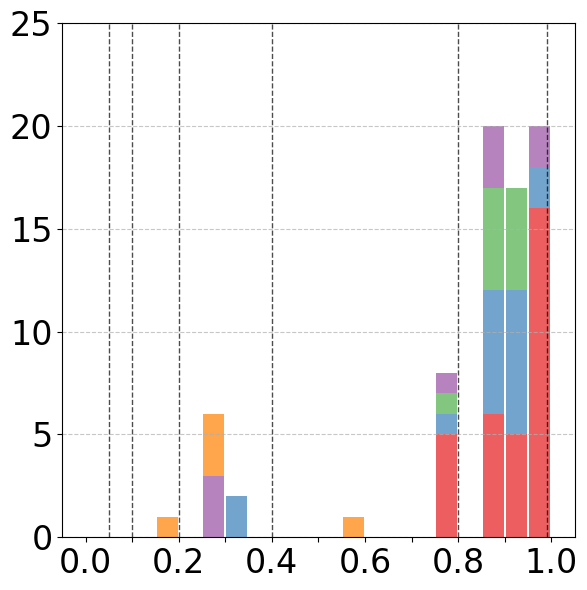

In [415]:
# Generate the prediction distribution bar plot
fig = plot_prediction_distribution_bars(
    result_df=diann_result_df,
    qval_threshold=0.01,
    proba_threshold=0.01,
    bin_width=0.05
)

# Display the plot
if fig:
    plt.show()

## Why did we lost identifications

In [409]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_lost_identifications(result_df, thresholds=['005', '010', '020', '040', '080', '099']):
    """
    Analyzes and visualizes why phosphopeptide identifications were lost compared to baseline.
    Processes each lost identification individually to ensure proper categorization.
    """
    thresh_to_float = {
        '005': 0.05, '010': 0.10, '020': 0.20,
        '040': 0.40, '080': 0.80, '099': 0.99
    }
    
    # Filter for phosphopeptides
    phospho_mask = result_df['ModifiedPeptide'].str.contains('UniMod:21', na=False)
    phospho_df = result_df[phospho_mask].copy()
    
    # Get baseline identifications
    baseline_mask = (
        phospho_df['000_found'] & 
        (np.isnan(phospho_df['000_qval']) | (phospho_df['000_qval'] <= 0.01)) & 
        (np.isnan(phospho_df['000_proba']) | (phospho_df['000_proba'] <= 0.01))
    )
    baseline_ids = set(phospho_df[baseline_mask].precursor_id)
    
    results = {
        'prediction_cutoff': [],
        'not_found': [],
        'confidence_decrease': []
    }
    
    for thresh in thresholds:
        thresh_float = thresh_to_float[thresh]
        
        # Get confident identifications for this threshold
        thresh_mask = (
            phospho_df[f'{thresh}_found'] & 
            (np.isnan(phospho_df[f'{thresh}_qval']) | (phospho_df[f'{thresh}_qval'] <= 0.01)) & 
            (np.isnan(phospho_df[f'{thresh}_proba']) | (phospho_df[f'{thresh}_proba'] <= 0.01))
        )
        thresh_ids = set(phospho_df[thresh_mask].precursor_id)
        
        # Get lost identifications
        lost_ids = baseline_ids - thresh_ids
        
        # Initialize counters for this threshold
        prediction_cutoff = 0
        not_found = 0
        confidence_decrease = 0
        
        # Process each lost identification individually
        for lost_id in lost_ids:
            peptide_data = phospho_df[phospho_df.precursor_id == lost_id].iloc[0]
            
            # First check if peptide was not found
            if not peptide_data[f'{thresh}_found']:
                if peptide_data['prediction'] < thresh_float:
                    prediction_cutoff += 1
                else:
                    not_found += 1
            # If found but didn't pass confidence thresholds
            else:
                qval = peptide_data[f'{thresh}_qval']
                proba = peptide_data[f'{thresh}_proba']
                
                if (np.isnan(qval) or qval > 0.01 or 
                    np.isnan(proba) or proba > 0.01):
                    confidence_decrease += 1
                else:
                    not_found += 1  # Fallback case
        
        results['prediction_cutoff'].append(prediction_cutoff)
        results['not_found'].append(not_found)
        results['confidence_decrease'].append(confidence_decrease)
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(6, 6))
    
    x = np.arange(len(thresholds))
    width = 0.25
    
    ax.bar(x - width, results['prediction_cutoff'], width, label='Prediction Cutoff', color='red')
    ax.bar(x, results['not_found'], width, label='Not Found', color='purple')
    ax.bar(x + width, results['confidence_decrease'], width, label='Confidence Decrease', color='blue')
    
    ax.set_xticks(x)
    ax.set_xticklabels(thresholds)
    ax.set_xlabel('Prediction Score Threshold')
    ax.set_ylabel('Number of Lost Phosphopeptides')
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    
    def add_value_labels(rects):
        for rect in rects:
            height = rect.get_height()
            if height > 0:
                ax.text(rect.get_x() + rect.get_width()/2., height,
                       f'{int(height)}',
                       ha='center', va='bottom')
    
    for container in ax.containers:
        add_value_labels(container)
    
    plt.tight_layout()
    return fig, results

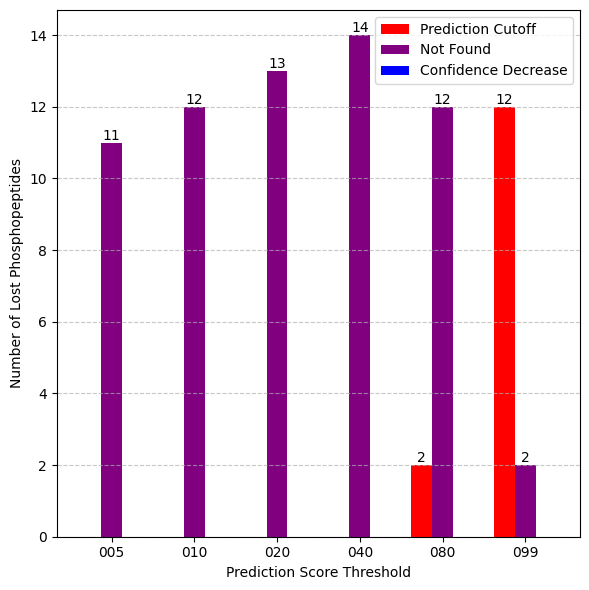

In [410]:
# Create the plot and get the results
fig, results = analyze_lost_identifications(result_with_predictions)

# Display the plot
plt.show()

## Why did we gain identifications? 

In [411]:
def analyze_and_plot_novel_identifications(result_df, baseline_threshold='000', confidence_threshold=0.01, ymax=10):
    """
    Analyzes reasons for novel phosphopeptide identifications compared to baseline threshold
    and creates a side-by-side bar plot showing the distribution of gain reasons across thresholds.
    
    The analysis categorizes gains into two main reasons:
    1. New Identification: Peptides identified at the new threshold but not at baseline.
    2. Confidence Increase: Peptides already identified at baseline but with improved confidence.
    
    Args:
        result_df (pd.DataFrame): DataFrame containing phosphopeptide identifications and their metrics.
        baseline_threshold (str): Reference threshold to compare against (default '000').
        confidence_threshold (float): Maximum q-value and probability for high-quality IDs.
        ymax (int, optional): Maximum y-axis value for the plot. Default is 10.
    
    Returns:
        matplotlib.figure.Figure: The generated novel identifications bar plot figure.
    """
    # Define all possible thresholds
    all_thresholds = ['000', '005', '010', '020', '040', '080', '099']
    
    # Get thresholds excluding baseline
    thresholds = sorted([t for t in all_thresholds if t != baseline_threshold])
    
    # Filter for phosphopeptides using ModifiedPeptide column
    phospho_mask = result_df['ModifiedPeptide'].str.contains(r'\(UniMod:21\)', regex=True, na=False)
    phospho_df = result_df[phospho_mask].copy()
    
    if phospho_df.empty:
        print("No phosphopeptides found with the specified modification.")
        return None
    
    # Get baseline identifications (both all and confident)
    baseline_mask = phospho_df[f'{baseline_threshold}_found']
    baseline_ids = set(phospho_df[baseline_mask]['precursor_id'])
    
    baseline_confident_mask = (
        baseline_mask & 
        (phospho_df[f'{baseline_threshold}_qval'] <= confidence_threshold) &
        (phospho_df[f'{baseline_threshold}_proba'] <= confidence_threshold)
    )
    baseline_confident_ids = set(phospho_df[baseline_confident_mask]['precursor_id'])
    
    if not baseline_confident_ids:
        print("No baseline high-confidence phosphopeptides found.")
        return None
    
    # Initialize results dictionary to store gains for each threshold
    results = {}
    
    for threshold in thresholds:
        # Identify confident peptides at this threshold
        threshold_mask = (
            phospho_df[f'{threshold}_found'] &
            (phospho_df[f'{threshold}_qval'] <= confidence_threshold) &
            (phospho_df[f'{threshold}_proba'] <= confidence_threshold)
        )
        threshold_ids = set(phospho_df[threshold_mask]['precursor_id'])
        
        # Find and categorize novel identifications
        novel_ids = threshold_ids - baseline_confident_ids
        gain_reasons = {
            'New Identification': 0,
            'Confidence Increase': 0
        }
        
        # Iterate over novel_ids to categorize gain reasons
        for novel_id in novel_ids:
            if novel_id in baseline_ids:
                gain_reasons['Confidence Increase'] += 1
            else:
                gain_reasons['New Identification'] += 1
        
        results[threshold] = gain_reasons
    
    # Plotting
    # Define colors for clear visual distinction between gain types
    colors = {
        'New Identification': '#04773B',    # Dark green
        'Confidence Increase': '#76C489'    # Light green
    }
    
    # Define categories and ensure consistent order
    categories = ['New Identification', 'Confidence Increase']
    
    # Create plot
    fig, ax = plt.subplots(figsize=(6, 6))  # Increased width for better readability
    
    # Set bar width and positions
    bar_width = 0.35
    x = np.arange(len(thresholds))
    
    # Plot bars side by side
    for i, category in enumerate(categories):
        values = [results[threshold][category] for threshold in thresholds]
        positions = x + (i - 0.5) * bar_width
        bars = ax.bar(positions, values, bar_width,
                      label=category,
                      color=colors[category],
                      edgecolor='white')
        
        # Add value labels on bars
        for rect in bars:
            height = rect.get_height()
            if height > 0:  # Only label non-zero bars
                ax.text(rect.get_x() + rect.get_width()/2., height,
                        f'{int(height)}',
                        ha='center', va='bottom',
                        fontsize=9,
                        color='black',
                        fontweight='bold',
                        rotation=0,
                        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))
    
    # Customize plot appearance
    ax.set_xlabel('Prediction Score Threshold', fontsize=12, labelpad=10)
    ax.set_ylabel('Number of Novel Phosphopeptides', fontsize=12, labelpad=10)
    ax.set_title(
        'Reasons for Novel Phosphopeptide Identifications Across Thresholds', 
        fontsize=14, 
        pad=15
    )
    
    # Set x-axis ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(thresholds, rotation=0, fontsize=11)
    
    # Set y-axis limits and ticks
    ax.set_ylim(0, ymax)
    ax.set_yticks(np.arange(0, ymax+1, 10))  # Adjust based on ymax
    ax.tick_params(axis='y', labelsize=11)
    
    # Add gridlines for y-axis
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Remove top and right spines for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Create and customize legend
    legend = ax.legend(
        title='Gain Reason',
        title_fontsize=11,
        fontsize=10,
        loc='upper right',
        framealpha=1.0,
        frameon=True,
        borderpad=1.0,
        handlelength=2.0,
        handletextpad=0.5
    )
    legend.get_frame().set_linewidth(1)
    
    plt.tight_layout()
    plt.show()
    
    return fig

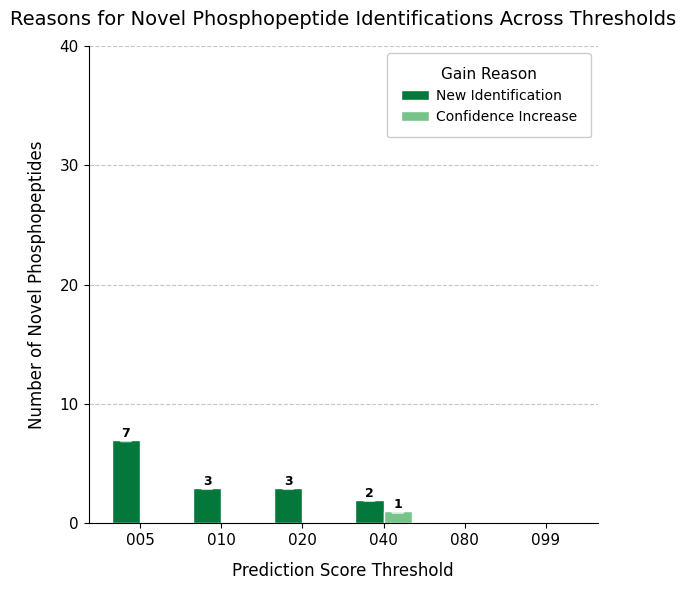

In [412]:
# Generate and display the novel identifications plot
fig = analyze_and_plot_novel_identifications(
    result_df=diann_result_df,
    baseline_threshold='000',
    confidence_threshold=0.01,
    ymax=40  # Adjust based on your data
)

# are those "Not Found" actually still in the library? 

In [413]:
speclib = pd.read_csv("/public/compomics/sander/regular/Orbitrap_AIF/speclibs_UniMod/Human_Phospho_005_speclib.spectronaut.tsv", sep = '\t')

FileNotFoundError: [Errno 2] No such file or directory: '/public/compomics/sander/regular/Orbitrap_AIF/speclibs_UniMod/Human_Phospho_005_speclib.spectronaut.tsv'

In [ ]:
speclib.head()

,ModifiedPeptide,StrippedPeptide,PrecursorCharge,PrecursorMz,IonMobility,iRT,ProteinId,RelativeFragmentIntensity,FragmentMz,FragmentType,FragmentNumber,FragmentCharge,FragmentLossType
0,LC[UniMod:4]LQSSGSVS[UniMod:21]SEPLSLQK,LCLQSSGSVSSEPLSLQK,2,1000.474487,464.514313,14.29216,NaN,0.011280,274.121948,b,1,1,noloss
1,LC[UniMod:4]LQSSGSVS[UniMod:21]SEPLSLQK,LCLQSSGSVSSEPLSLQK,2,1000.474487,464.514313,14.29216,NaN,0.012748,387.206024,b,2,1,noloss
2,LC[UniMod:4]LQSSGSVS[UniMod:21]SEPLSLQK,LCLQSSGSVSSEPLSLQK,2,1000.474487,464.514313,14.29216,NaN,0.001641,515.264648,b,3,1,noloss
3,LC[UniMod:4]LQSSGSVS[UniMod:21]SEPLSLQK,LCLQSSGSVSSEPLSLQK,2,1000.474487,464.514313,14.29216,NaN,0.006523,602.296692,b,4,1,noloss
4,LC[UniMod:4]LQSSGSVS[UniMod:21]SEPLSLQK,LCLQSSGSVSSEPLSLQK,2,1000.474487,464.514313,14.29216,NaN,0.000000,689.328735,b,5,1,noloss


get the ModifiedPepetide column for "Not Found"

need to convert "(UniMod:21)" to "[UniMod:21]"

In [ ]:
def find_not_found_peptides(diann_result_df, speclib, baseline_threshold='000', next_threshold='005', confidence_threshold=0.01):
    """
    Identifies peptides that were specifically lost due to "Not Found" category between two thresholds.
    """
    # Filter for phosphopeptides
    phospho_mask = diann_result_df['ModifiedPeptide'].str.contains('UniMod:21', na=False)
    phospho_df = diann_result_df[phospho_mask].copy()
    
    # Get baseline high-confidence identifications
    baseline_mask = (
        phospho_df[f'{baseline_threshold}_found'] & 
        (phospho_df[f'{baseline_threshold}_qval'].fillna(1) <= confidence_threshold) & 
        (phospho_df[f'{baseline_threshold}_proba'].fillna(1) <= confidence_threshold)
    )
    baseline_ids = set(phospho_df[baseline_mask]['precursor_id'])
    
    # Get identifications for next threshold
    threshold_mask = (
        phospho_df[f'{next_threshold}_found'] & 
        (phospho_df[f'{next_threshold}_qval'].fillna(1) <= confidence_threshold) & 
        (phospho_df[f'{next_threshold}_proba'].fillna(1) <= confidence_threshold)
    )
    threshold_ids = set(phospho_df[threshold_mask]['precursor_id'])
    lost_ids = baseline_ids - threshold_ids
    
    # Get peptides specifically lost due to "Not Found"
    not_found_peptides = []
    for lost_id in lost_ids:
        peptide_data = phospho_df[phospho_df['precursor_id'] == lost_id].iloc[0]
        
        if not peptide_data[f'{next_threshold}_found']:
            try:
                prediction_value = float(peptide_data['prediction'])
                threshold_value = float(next_threshold)/100
                if prediction_value >= threshold_value:  # Only include if NOT lost due to prediction cutoff
                    not_found_peptides.append(peptide_data['ModifiedPeptide'])
            except (ValueError, TypeError):
                not_found_peptides.append(peptide_data['ModifiedPeptide'])
                
    # Print verification count
    print(f"Number of peptides found as 'Not Found': {len(not_found_peptides)}")
    print("This number should match the 'Not Found' bar in your plot for threshold 005")
    
    # Convert modification format and check library presence
    def convert_mod_format(peptide):
        return peptide.replace('(UniMod:', '[UniMod:').replace(')', ']')
    
    # Check presence in spectral library
    results = {
        'present': [],
        'absent': [],
        'details': {}
    }
    
    for peptide in not_found_peptides:
        converted_peptide = convert_mod_format(peptide)
        is_present = converted_peptide in speclib['ModifiedPeptide'].values
        
        if is_present:
            results['present'].append(peptide)
        else:
            results['absent'].append(peptide)
            results['details'][peptide] = {
                'original': peptide,
                'converted': converted_peptide
            }
    
    # Print summary
    print(f"\nResults:")
    print(f"Found in spectral library: {len(results['present'])}")
    print(f"Not found in spectral library: {len(results['absent'])}")
    
    if results['absent']:
        print("\nDetails for missing peptides:")
        for peptide in results['absent']:
            print(f"\nOriginal: {results['details'][peptide]['original']}")
            print(f"Converted: {results['details'][peptide]['converted']}")
    
    return results

In [ ]:
# Example usage
results = find_not_found_peptides(diann_result_df, speclib)

Number of peptides found as 'Not Found': 20
This number should match the 'Not Found' bar in your plot for threshold 005

Results:
Found in spectral library: 20
Not found in spectral library: 0


To further investigate the source of lost identifications between thresholds 000 and 005, we analyzed the peptides classified as "Not Found" (n=20) in more detail. When these peptides were cross-referenced with the spectral library used for the 005 threshold analysis, all peptides were confirmed to be present in the library. This unexpected finding reveals that while these peptides were retained in the library, changes in the overall library composition between thresholds 000 and 005 somehow impacted DIA-NN's ability to identify them.

Since the spectral library composition is the only variable that changed between these analyses, the loss of these identifications must be attributed to how changes in the library affect DIA-NN's identification process. This suggests that the impact of modifying spectral libraries extends beyond the simple presence or absence of individual peptides, potentially affecting the tool's ability to confidently identify certain peptides even when they remain in the library.